In [21]:
# переменный по умлочаю в функции

In [13]:
def f1(x, z=['cc']):
    print(z)
    z.append(x)
    print(z)


In [14]:
f1('1')

['cc']
['cc', '1']


In [15]:
f1('2')

['cc', '1']
['cc', '1', '2']


In [16]:
# join 

In [17]:
ls -al  /tmp/sql_dump/db.sqlite3

-rw-r--r-- 1 jupyter-amtsu jupyter-amtsu 2596339712 Jan 15 19:00 /tmp/sql_dump/db.sqlite3


In [18]:
import sqlite3
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()


In [19]:
cursor.execute("""
select title, price
from products_history 
where id in (1991, 1992, 1993 )
""")

print(cursor.fetchall())

[('Мичуринский 2 27 39.8 Озерная ул., вл. 7 55.687726,37.471704', 19647884), ('Южнопортовая 1 31 68.7 ул. Южнопортовая, вл.28-28а 55.705727,37.696445', 24214830), ('Мичуринский 6 15 86.9 Озерная ул., вл. 7 55.687726,37.471704', 44826261)]


In [25]:
cursor.execute("""
select *
from person_person 
""")

print(cursor.fetchall())

[(1, 'Artem', 'Tsurkov'), (2, 'Artem', 'Tsurkov'), (3, 'Artem', 'Tsurkov')]


In [26]:
cursor.execute("""
insert into person_person(name, surname) values('Artem', 'Tsurkov')
""")

print(cursor.fetchall())

[]


In [27]:
cursor.execute("""
select id, person_id, offer_id, datetime, final_sum, quantity, price, title
from person_check
""")

print(cursor.fetchall())

[]


In [28]:
cursor.execute("""
insert into person_check(person_id, offer_id, datetime, final_sum, quantity, price, title) values(1, 1991, "2022-12-18 19:56:00", 13753518.00, 1, 13753518.00, "Мичуринский 2 27 39.8")
""")

print(cursor.fetchall())

[]


In [29]:
cursor.execute("""
insert into person_check(person_id, offer_id, datetime, final_sum, quantity, price, title) values(1, 1992, "2022-12-18 19:57:00", 16950381.00, 1, 16950381.00, "Южнопортовая 1 31 68.7 ул. Южнопортовая")
""")

print(cursor.fetchall())

[]


In [30]:
cursor.execute("""
select id, person_id, offer_id, datetime, final_sum, quantity, price, title
from person_check
""")
cursor.fetchall()

[(1,
  1,
  1991,
  '2022-12-18 19:56:00',
  13753518,
  1,
  13753518,
  'Мичуринский 2 27 39.8'),
 (2,
  1,
  1992,
  '2022-12-18 19:57:00',
  16950381,
  1,
  16950381,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая')]

In [31]:
cursor.execute(""" 
update person_check set  offer_id = 1991  where id = 1
""")

print(cursor.fetchall())

[]


In [32]:
cursor.execute("""
select id, person_id, offer_id, datetime, final_sum, quantity, price, title
from person_check
""")
cursor.fetchall()

[(1,
  1,
  1991,
  '2022-12-18 19:56:00',
  13753518,
  1,
  13753518,
  'Мичуринский 2 27 39.8'),
 (2,
  1,
  1992,
  '2022-12-18 19:57:00',
  16950381,
  1,
  16950381,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая')]

In [33]:
cursor.execute("""
select 
""")

print(cursor.fetchall())

OperationalError: incomplete input

In [34]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, person.id, person.name, person.surname
from person_check as c join person_person as person
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518, 1, 'Artem', 'Tsurkov'),
 (1, '2022-12-18 19:56:00', 1, 13753518, 2, 'Artem', 'Tsurkov'),
 (1, '2022-12-18 19:56:00', 1, 13753518, 3, 'Artem', 'Tsurkov'),
 (1, '2022-12-18 19:56:00', 1, 13753518, 4, 'Artem', 'Tsurkov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 1, 'Artem', 'Tsurkov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 2, 'Artem', 'Tsurkov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 3, 'Artem', 'Tsurkov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 4, 'Artem', 'Tsurkov')]

In [35]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, p1.id, p1.name, p1.surname
from person_check as c join person_person as p1 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518, 1, 'Artem', 'Tsurkov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 1, 'Artem', 'Tsurkov')]

In [36]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, p1.id, p1.name, p1.surname
from person_person as p1  join  person_check as c 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518, 1, 'Artem', 'Tsurkov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 1, 'Artem', 'Tsurkov')]

In [37]:
#join inner, outher, left, right

In [38]:
# left join

In [39]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, p1.id, p1.name, p1.surname
from person_check as c left join person_person as p1 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518, 1, 'Artem', 'Tsurkov'),
 (2, '2022-12-18 19:57:00', 1, 16950381, 1, 'Artem', 'Tsurkov')]

In [40]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select p1.id, p1.name, p1.surname, c.id, c.datetime, c.person_id, c.final_sum
from person_person as p1 left join person_check as c 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, 'Artem', 'Tsurkov', 1, '2022-12-18 19:56:00', 1, 13753518),
 (1, 'Artem', 'Tsurkov', 2, '2022-12-18 19:57:00', 1, 16950381),
 (2, 'Artem', 'Tsurkov', None, None, None, None),
 (3, 'Artem', 'Tsurkov', None, None, None, None),
 (4, 'Artem', 'Tsurkov', None, None, None, None)]

In [41]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select p1.id, p1.name, p1.surname, c.id, c.datetime, c.person_id, c.final_sum
from person_person as p1 inner join person_check as c 
    on c.person_id = p1.id 
""")

cursor.fetchall()

[(1, 'Artem', 'Tsurkov', 1, '2022-12-18 19:56:00', 1, 13753518),
 (1, 'Artem', 'Tsurkov', 2, '2022-12-18 19:57:00', 1, 16950381)]

In [42]:
#  join 3 таблиц

In [43]:
# все чеки с фио персон котрые их купили плюс превоналваыы офер
cursor.execute("""
select p1.id, p1.name, p1.surname, c.id, c.title, c.datetime, c.person_id, c.final_sum, h.id, h.price_sale, h.title
from person_person as p1 inner join person_check as c 
    on c.person_id = p1.id  join products_history as h on c.offer_id = h.id
""") 

cursor.fetchall()

[(1,
  'Artem',
  'Tsurkov',
  1,
  'Мичуринский 2 27 39.8',
  '2022-12-18 19:56:00',
  1,
  13753518,
  1991,
  13753518,
  'Мичуринский 2 27 39.8 Озерная ул., вл. 7 55.687726,37.471704'),
 (1,
  'Artem',
  'Tsurkov',
  2,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая',
  '2022-12-18 19:57:00',
  1,
  16950381,
  1992,
  16950381,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая, вл.28-28а 55.705727,37.696445')]

In [44]:
# все чеки с фио персон котрые их купили плюс превоналваыы офер
cursor.execute("""
select 
    p1.id, 
    p1.name, 
    p1.surname, 
    c.id, 
    c.title, 
    c.datetime, 
    c.person_id, 
    c.final_sum, 
    h.id, 
    h.price_sale, 
    h.title
from person_person as p1 
    inner join person_check as c 
        on c.person_id = p1.id  
    join products_history as h 
        on c.offer_id = h.id
""") 

cursor.fetchall()

[(1,
  'Artem',
  'Tsurkov',
  1,
  'Мичуринский 2 27 39.8',
  '2022-12-18 19:56:00',
  1,
  13753518,
  1991,
  13753518,
  'Мичуринский 2 27 39.8 Озерная ул., вл. 7 55.687726,37.471704'),
 (1,
  'Artem',
  'Tsurkov',
  2,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая',
  '2022-12-18 19:57:00',
  1,
  16950381,
  1992,
  16950381,
  'Южнопортовая 1 31 68.7 ул. Южнопортовая, вл.28-28а 55.705727,37.696445')]

In [45]:
cursor.execute(""" 
update person_check set  price = 15000000  where id = 3
""")

print(cursor.fetchall())





[]


In [46]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select person_check.id, person_check.datetime,  person_check.person_id,  person_check.price
from person_check 
""")

cursor.fetchall()

[(1, '2022-12-18 19:56:00', 1, 13753518),
 (2, '2022-12-18 19:57:00', 1, 16950381)]

In [47]:
#окнооные функции

In [48]:
# group

cursor.execute("""
select person_id, count(1), max(price)
from person_check
group by person_id
""")

cursor.fetchall()

[(1, 2, 16950381)]

In [49]:
13753518

13753518

In [50]:
#пронмуеруме записаи для каждо полльзователя
cursor.execute("""
select person_id, 
    id,
    datetime,  
    price,
    ROW_NUMBER() OVER(PARTITION BY person_id ORDER BY datetime desc) AS row_number,
    LEAD(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS prev_price,
    LAG(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS p_price
from person_check

""")

cursor.fetchall()

[(1, 2, '2022-12-18 19:57:00', 16950381, 1, 13753518, 0),
 (1, 1, '2022-12-18 19:56:00', 13753518, 2, 0, 16950381)]

In [51]:
#пронмуеруме записаи для каждо полльзователя
cursor.execute("""
select person_id, 
    id,
    datetime,  
    price,
    ROW_NUMBER() OVER(PARTITION BY person_id ORDER BY datetime desc) AS row_number,
    LEAD(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS prev_price,
    LAG(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS p_price
from person_check

order by price desc
""")

cursor.fetchall()

[(1, 2, '2022-12-18 19:57:00', 16950381, 1, 13753518, 0),
 (1, 1, '2022-12-18 19:56:00', 13753518, 2, 0, 16950381)]

In [52]:
cursor.execute("""
insert into person_check(person_id, offer_id, datetime, final_sum, quantity, price, title) 
values(3, 1993, "2022-12-18 19:58:00", 100, 1, 100, "xyz")
""")

print(cursor.fetchall())


[]


In [ ]:
cursor.execute("""
            WITH sales_numbered AS (
                SELECT 
                    id, 
                    title,
                    price_sale,  
                    LEAD(price_sale,1,0) OVER (PARTITION BY title, url ORDER BY  title, id desc ) AS prev_price_sale,  
                    price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
                    ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
                FROM products_history
                where datetime_create >= "{d.date()}"
                ORDER BY id desc
                LIMIT 1000000
            )
            SELECT 
                id, 
                title,
                price_sale,  
                prev_price_sale,
                diff,
                ROUND(diff / price_sale * 100) as per,
                row_number
            FROM sales_numbered
            WHERE row_number = 1 and diff !=0 and diff != price_sale and (diff + prev_price_sale) != 0
            Order by per;

        """)

In [105]:
cursor.execute("""
SELECT 
    id, 
    title,
    price_sale,  
    LEAD(price_sale,1,0) OVER (PARTITION BY title, url ORDER BY  title, id desc ) AS prev_price_sale,  
    price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
    ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
FROM products_history
where datetime_create >= "2022-12-17"
ORDER BY id desc
LIMIT 10     
""")

cursor.fetchall()


[(893488,
  'Соус бальзамический Monini Balsamic Glaze со вкусом инжира, 250 г',
  786.99,
  0,
  786.99,
  1),
 (893487,
  'Топик-бра Pompea без боковых швов Brassiere Seam Nero, S/M',
  599.99,
  0,
  599.99,
  1),
 (893486,
  'Маска-патчи для глаз Organic Kitchen Супер увлажняющие Чайные пакетики сенча жидкие, 100 мл',
  212.99,
  0,
  212.99,
  1),
 (893485, 'Филе тунца, вес', 1899, 0, 1899, 1),
 (893484,
  'Масло магниевое Pure Bases для стройности тела, 150 мл',
  323,
  0,
  323,
  1),
 (893483,
  'Устройство зарядное GP U411 4КК.АА/2700, 1 шт',
  2039.99,
  0,
  2039.99,
  1),
 (893482, 'Лопатка Atmosphere Voyage нейлоновая', 152.9, 0, 152.9, 1),
 (893481,
  'Крем-краска для волос Syoss Color Интенсивный осветлитель тон 12-0',
  472.99,
  0,
  472.99,
  1),
 (893480,
  'Саморез универсальный «Каждый день» 5,0x 50 желтый оцинкованный, 8шт',
  39.99,
  0,
  39.99,
  1),
 (893479,
  'Пенка для лица очищающая Holika Holika Дейли Гарден рис, 120 мл',
  449.99,
  0,
  449.99,
  1)]

In [ ]:
# графики

In [1]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.6.2
module://matplotlib_inline.backend_inline


3.6.2
module://matplotlib_inline.backend_inline


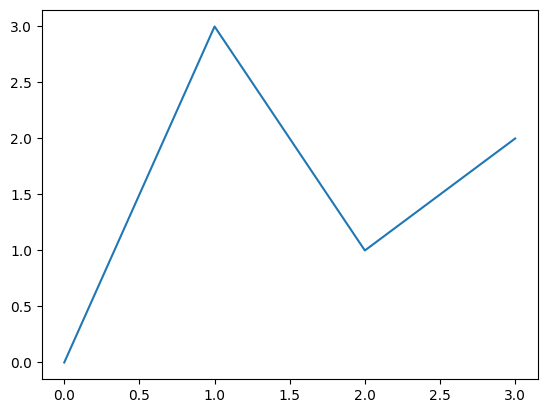

In [2]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
plt.show()


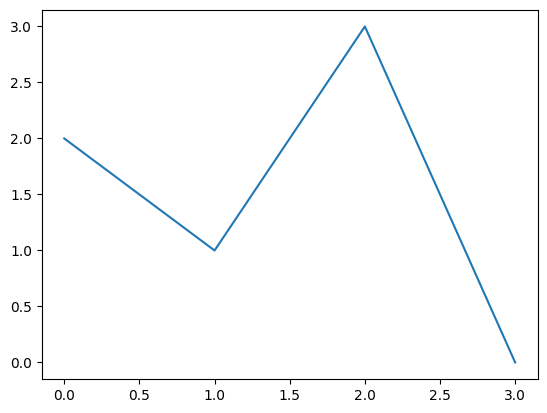

In [13]:
plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.show()

[ 0.          0.12693304  0.25386607  0.38079911  0.50773215  0.63466518
  0.76159822  0.88853126  1.01546429  1.14239733  1.26933037  1.3962634
  1.52319644  1.65012947  1.77706251  1.90399555  2.03092858  2.15786162
  2.28479466  2.41172769  2.53866073  2.66559377  2.7925268   2.91945984
  3.04639288  3.17332591  3.30025895  3.42719199  3.55412502  3.68105806
  3.8079911   3.93492413  4.06185717  4.1887902   4.31572324  4.44265628
  4.56958931  4.69652235  4.82345539  4.95038842  5.07732146  5.2042545
  5.33118753  5.45812057  5.58505361  5.71198664  5.83891968  5.96585272
  6.09278575  6.21971879  6.34665183  6.47358486  6.6005179   6.72745093
  6.85438397  6.98131701  7.10825004  7.23518308  7.36211612  7.48904915
  7.61598219  7.74291523  7.86984826  7.9967813   8.12371434  8.25064737
  8.37758041  8.50451345  8.63144648  8.75837952  8.88531256  9.01224559
  9.13917863  9.26611167  9.3930447   9.51997774  9.64691077  9.77384381
  9.90077685 10.02770988 10.15464292 10.28157596 10.4

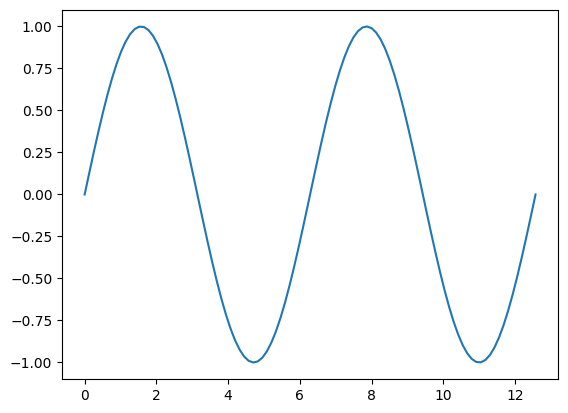

In [2]:
import numpy as np
x = np.linspace(0, 4 * np.pi, 100)

print(x)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

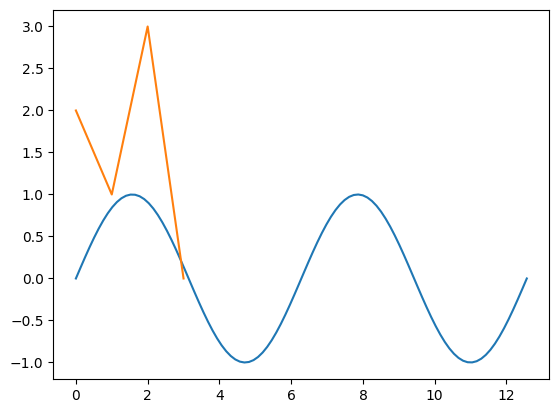

In [15]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.show()

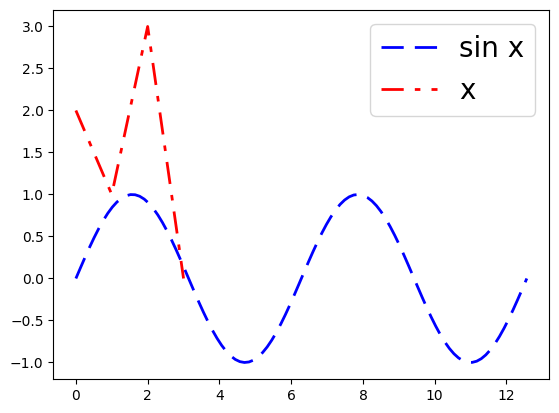

In [20]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), linewidth=2, color='b',  dashes=[8, 4], label=r'sin x')
plt.plot([0, 1, 2, 3], [2, 1, 3, 0], linewidth=2, color='r', dashes=[8, 4, 2, 4], label=r'x')
plt.legend(fontsize=20, loc=1)
plt.show()

In [21]:
# теперь попробуем соединить с нашими данными из бд

In [8]:
ls -la /tmp/sql_dump/db.sqlite3

-rw-r--r-- 1 jupyter-amtsu jupyter-amtsu 2373513216 Jan 12 14:40 /tmp/sql_dump/db.sqlite3


In [3]:
ls -la /home/jupyter-amtsu/project/price_alert/db.sqlite3

-rw-r--r-- 1 jupyter-amtsu jupyter-amtsu 2373513216 Jan 12 04:08 /home/jupyter-amtsu/project/price_alert/db.sqlite3


In [45]:
mkdir /tmp/sql_dump

mkdir: cannot create directory '/tmp/sql_dump': File exists


In [3]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
udev            1.9G     0  1.9G   0% /dev
tmpfs           394M 1008K  393M   1% /run
/dev/vda2        59G   42G   15G  75% /
tmpfs           2.0G     0  2.0G   0% /dev/shm
tmpfs           5.0M     0  5.0M   0% /run/lock
tmpfs           2.0G     0  2.0G   0% /sys/fs/cgroup
/dev/loop0      117M  117M     0 100% /snap/core/14399
/dev/loop1       64M   64M     0 100% /snap/core20/1738
/dev/loop2       45M   45M     0 100% /snap/certbot/2582
/dev/loop4       45M   45M     0 100% /snap/certbot/2618
/dev/loop5       64M   64M     0 100% /snap/core20/1778
/dev/loop3      117M  117M     0 100% /snap/core/14447


In [4]:
cp /home/jupyter-amtsu/project/price_alert/db.sqlite3 /tmp/sql_dump/db.sqlite3

In [5]:
import sqlite3
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()

In [10]:
cursor.execute("""
.tables
""")
cursor.fetchall()

OperationalError: near ".": syntax error

In [18]:
cursor.execute("""
select  price_sale, date(datetime_create)
from products_history 
where price > 10000
    and title like "%куртка%"
order by  price asc
limit 1000000
""")

x = []
y = []
for i in cursor.fetchall():
    x.append(i[1])
    y.append(i[0])

In [12]:

cursor.execute("""
select  distinct(title)
from products_history 
where title like "%Nutella%"
limit 1000000
""")

print(cursor.fetchall())

[('Батончик Nutella B-Ready 22г',), ('Паста Nutella Шоколадная 52г',), ('Паста Nutella Шоколадная 180г',), ('Паста Nutella Шоколадная 350г',), ('Паста Nutella Шоколадная 630г',), ('Паста Nutella ореховая с добавлением какао 350г',), ('Паста шоколадная Nutella, 350 г',), ('Паста шоколадно-ореховая Nutella, 630 г',), ('Паста шоколадная Nutella с хлебными палочками, 52 г',), ('Паста шоколадная Nutella, 180 г',), ('Батончик вафельный Nutella B-ready с пастой, 22 г',)]


In [7]:

cursor.execute("""
select  price_sale, date(datetime_create) as d, title
from products_history 
where title like "%utella%"
    and title like "%350%"
    and title  like "%околадная%"
order by  d asc, price_sale asc
limit 1000000
""")

#print(cursor.fetchall())
x = []
y = []
for i in cursor.fetchall():
    print(i)
    x.append(i[1])
    y.append(i[0])

(389, '2022-12-06', 'Паста Nutella Шоколадная 350г')
(389, '2022-12-07', 'Паста Nutella Шоколадная 350г')
(389, '2022-12-07', 'Паста Nutella Шоколадная 350г')
(359, '2022-12-08', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-09', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-10', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-11', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-12', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-13', 'Паста Nutella Шоколадная 350г')
(499, '2022-12-14', 'Паста Nutella Шоколадная 350г')
(455, '2022-12-15', 'Паста Nutella Шоколадная 350г')
(343.49, '2022-12-19', 'Паста шоколадная Nutella, 350 г')
(343.49, '2022-12-20', 'Паста шоколадная Nutella, 350 г')
(343.49, '2022-12-20', 'Паста шоколадная Nutella, 350 г')
(343.49, '2022-12-22', 'Паста шоколадная Nutella, 350 г')
(343.49, '2022-12-22', 'Паста шоколадная Nutella, 350 г')
(343.49, '2022-12-22', 'Паста шоколадная Nutella, 350 г')
(343.49, '2022-12-23', 'Паста шоколадная Nutella, 350 г')
(343.49, '2

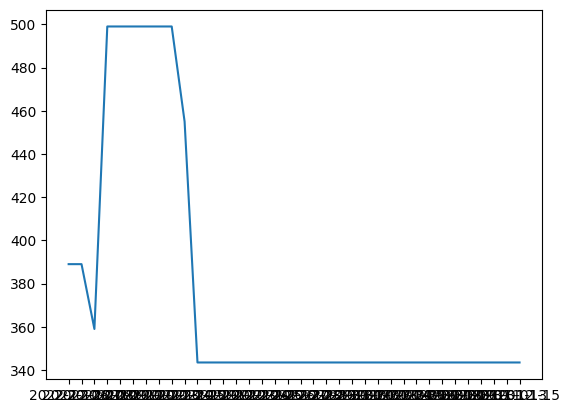

In [8]:
plt.figure()
#plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.plot(x, y)
plt.show()

In [18]:

cursor.execute("""
select  distinct(title)
from products_history 
where title like "%raffaello%"
limit 1000000
""")

print(cursor.fetchall())

[('Набор Конфет Raffaello 70г',), ('Набор Конфет Raffaello 90г',), ('Набор Конфет Raffaello 150г',), ('Конфеты Raffaello 40г',), ('Набор Конфет Raffaello Тортик 100г',), ('Набор Конфет Raffaello Маракуйя 150г',), ('Набор Конфет Raffaello 240г',), ('Набор Конфет Raffaello Тортик 200г',), ('Набор Конфет Raffaello Сердце 300г',), ('НАБОР КОНФЕТ RAFFAELLO СУНДУЧОК 240г',), ('НАБОР КОНФЕТ RAFFAELLO 500Г',), ('Конфеты raffaello со вкусом маракуйи покрытые кокосовой стружкой с цельным миндальным орехом внутри 150г',), ('Набор конфет RAFFAELLO Тортик с цельным миндальным орехом, 100 г',), ('Конфеты RAFFAELLO маракуйя, 150 г',), ('Конфеты Raffaello Сердце трансформер, 300 г',), ('Набор конфет Raffaello с миндальным орехом сундук, 240 г',), ('Набор конфет Raffaello Торт с цельным миндальным орехом, 500 г',), ('Набор конфет Raffaello Торт с цельным миндальным орехом, 200 г',), ('Конфеты RAFFAELLO с миндальным орехом, 150 г',), ('Конфеты RAFFAELLO, 70 г',), ('Конфеты RAFFAELLO с миндальным орехом,

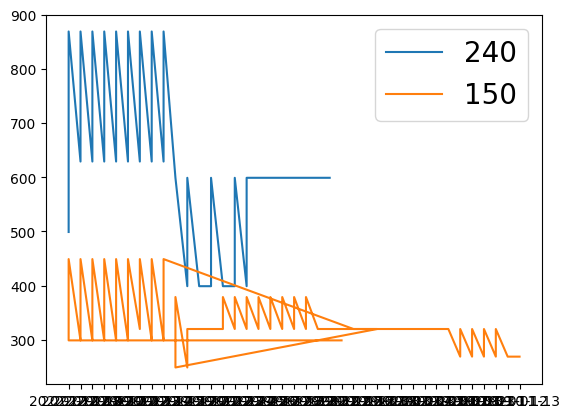

In [9]:

cursor.execute("""
select  price_sale, date(datetime_create) as d, title
from products_history 
where title like "%raffaello%"
    and title like "%240%"
order by  d asc, price_sale asc, title asc
limit 1000000
""")

#print(cursor.fetchall())
x = []
y = []
for i in cursor.fetchall():
    #print(i)
    x.append(i[1])
    y.append(i[0])
    
    

cursor.execute("""
select  price_sale, date(datetime_create) as d, title
from products_history 
where title like "%raffaello%"
    and title like "%150%"
order by  d asc, price_sale asc, title asc
limit 1000000
""")

#print(cursor.fetchall())
x2 = []
y2 = []
for i in cursor.fetchall():
    #print(i)
    x2.append(i[1])
    y2.append(i[0])
    
plt.figure()
#plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.plot(x, y, label=r'240')
plt.plot(x2, y2, label=r'150')
plt.legend(fontsize=20, loc=1)
plt.show()

In [6]:
ls -la 

total 312
drwxr-xr-x  3 jupyter-amtsu jupyter-amtsu   4096 Dec 23 19:46 ./
drwxr-xr-x 23 jupyter-amtsu jupyter-amtsu   4096 Dec 19 19:42 ../
drwxr-xr-x  2 jupyter-amtsu jupyter-amtsu   4096 Dec 18 18:42 .ipynb_checkpoints/
-rw-r--r--  1 jupyter-amtsu jupyter-amtsu 304620 Dec 23 19:46 lesson_25.ipynb


In [7]:
import sqlite3
#connection = sqlite3.connect('/home/jupyter-amtsu/project/price_alert/db.sqlite3')
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()

In [8]:


cursor.execute("""
select 
datetime_create, count(1)

from products_history
where url like "%level.ru%"
    and datetime_create >  "2022-12-07 00:05" and  datetime_create <  "2022-12-08"
--group by date(datetime_create)
limit 100
""")

print(cursor.fetchall())

[('2022-12-07 00:12:12.726653', 1090)]


In [9]:
# удалил лишние данные

cursor.execute("""
delete
from products_history 
where url like "%level.ru%"
    and datetime_create >  "2022-12-07 05:05" and  datetime_create <  "2022-12-08"
""")

print(cursor.fetchall())

[]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


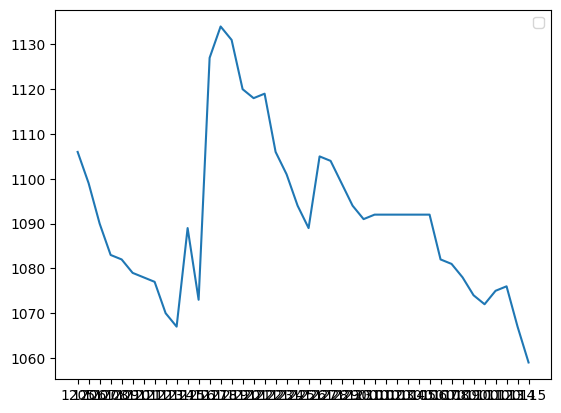

In [10]:
# график количества доступных предложений на рынке

cursor.execute("""
select 
strftime('%m%d', (datetime_create)), count(1)

from products_history 
where url like "%level.ru%"
    
group by date(datetime_create)
limit 1000
""")

x2 = []
y2 = []
for i in cursor.fetchall():
    #print(i)
    x2.append(i[0])
    y2.append(i[1])
    
plt.figure()
plt.plot(x2, y2)#, label=r'150')
plt.legend(fontsize=10, loc=1)
plt.show()

#print(cursor.fetchall())

In [15]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
udev            1.9G     0  1.9G   0% /dev
tmpfs           394M  1.1M  393M   1% /run
/dev/vda2        59G   35G   22G  62% /
tmpfs           2.0G     0  2.0G   0% /dev/shm
tmpfs           5.0M     0  5.0M   0% /run/lock
tmpfs           2.0G     0  2.0G   0% /sys/fs/cgroup
/dev/loop0      117M  117M     0 100% /snap/core/14399
/dev/loop3       64M   64M     0 100% /snap/core20/1695
/dev/loop1       64M   64M     0 100% /snap/core20/1738
/dev/loop2       45M   45M     0 100% /snap/certbot/2582
/dev/loop4       45M   45M     0 100% /snap/certbot/2618


In [5]:
#connection.commit()

In [4]:
#connection.close()

In [17]:
#нужен графки сколько новых обетов появилос + сколько страрых обектов ушло

In [18]:
#почиать ли обекты которые имебт большге чем одно окно 

In [47]:
import sqlite3
#connection = sqlite3.connect('/home/jupyter-amtsu/project/price_alert/db.sqlite3')
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()

In [48]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

import matplotlib.pyplot as plt

3.6.2
module://matplotlib_inline.backend_inline


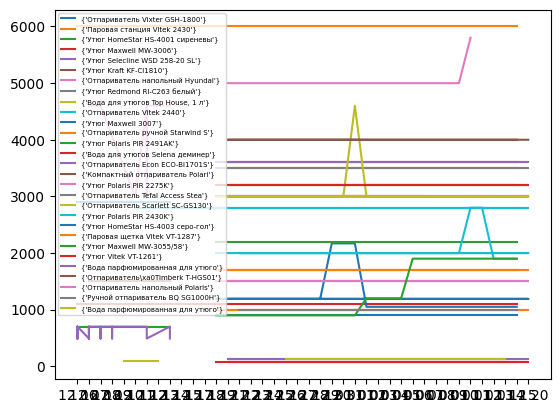

In [11]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%отпари%"
    or category like "%отпари%"
    or description like "%отпари%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:30])
      
#print(x)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=5, loc=2)
plt.show()


#print(cursor.fetchall())

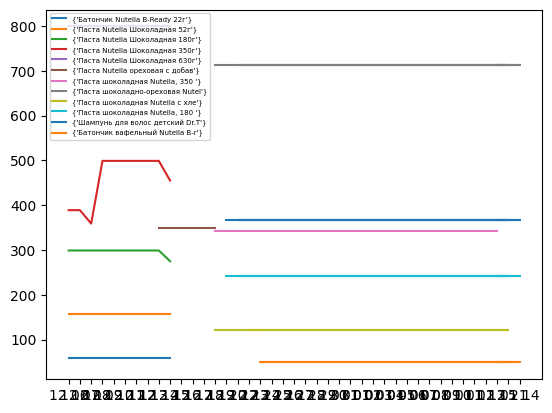

In [12]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%utell%"
    or category like "%utell%"
    or description like "%utell%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:30])
      
#print(x)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=5, loc=2)
plt.show()


#print(cursor.fetchall())

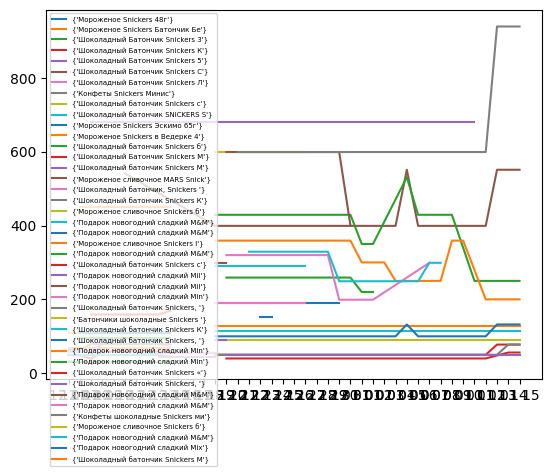

In [13]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%snickers%"
    or category like "%snickers%"
    or description like "%snickers%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:30])
      
#print(x)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=5, loc=2)
plt.show()


#print(cursor.fetchall())

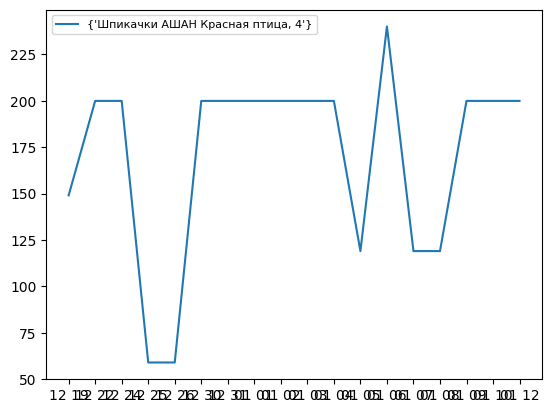

In [14]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%Шпикачки АШАН Красная%"
    or category like "%Шпикачки АШАН Красная%"
    or description like "%Шпикачки АШАН Красная%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:30])
      
    #print(i)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=8, loc=2)
plt.show()


#print(cursor.fetchall())

In [ ]:
#

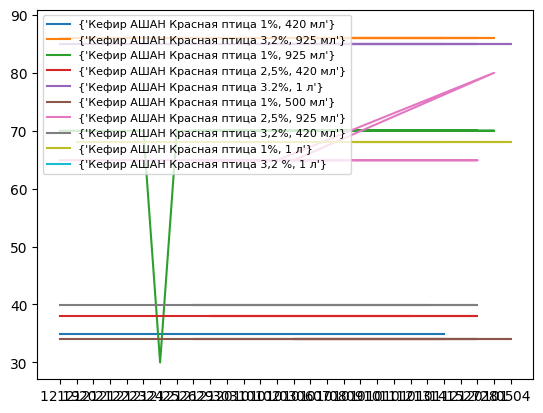

In [15]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%Кефир АШАН%"
    or category like "%Кефир АШАН%"
    or description like "%Кефир АШАН%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:40])
      
    #print(i)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=8, loc=2)
plt.show()


#print(cursor.fetchall())